# Modelis nuspėjantis vartotojų pasitenkinimą



## Klausimai:
 - Koks modelio tikslumas?
 - Ar spėjimai pasiskirstę proporcingai? (ar nėra visi spėjimai tik teigiami ar neigiami)
 - Galimi modelio tobulinimo metodai

### Reikiamų bibliotekų importavimas:

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import statsmodels.formula.api as smf

### Duomenų bazės importavimas ir peržiūra (dauguma žingsnių panaudota iš pirmos darbo dalies)

In [107]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [108]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### Sukuriamos funkcijos reikšmių keitimui į skaitines vertes, bei sukuriama bendra funkcija, kuri panaudojama pakeisti abu duomenų rinkinius vienodai (dauguma žingsnių panaudota iš pirmos darbo dalies)

In [109]:
def gender(gender):
    if gender == 'Female':
        return 1
    else:
        return 0
    
def customer_type(customer):
    if customer == 'Loyal Customer':
        return 1
    else:
        return 0

    
def travel_type(travel):
    if travel == 'Business travel':
        return 1
    else:
        return 0
    
def tclass(tclass):
    if tclass == 'Business':
        return 2
    elif tclass == 'Eco Plus':
        return 1
    else:
        return 0    
    
def satisfaction(satisfaction):
    if satisfaction == 'satisfied':
        return 1
    else:
        return 0
    
def transform_data(df):
    df = df.drop(columns=['Unnamed: 0', 'id'])    
    df['Gender'] = df['Gender'].map(gender)
    df['Customer Type'] = df['Customer Type'].map(customer_type)
    df['Type of Travel'] = df['Type of Travel'].map(travel_type)
    df['Class'] = df['Class'].map(tclass)
    df['satisfaction'] = df['satisfaction'].map(satisfaction)
    df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())    
    return df

df_train = transform_data(df_train)
df_test = transform_data(df_test)

In [110]:
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### Sukuriamas logistinės regresijos modelis

In [111]:
columns = df_train.columns[:-1]
X_train = df_train[columns]
y_train = df_train['satisfaction']
X_test = df_test[columns]
y_test = df_test['satisfaction']

In [112]:
logistic = LogisticRegression(max_iter=10000)

In [113]:
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [114]:
predictions = logistic.predict(X_test)

### Vertinamas modelio tikslumas

In [124]:
result_columns = {'Accuracy score': [accuracy_score(y_test, predictions)], 'Recall score': [recall_score(y_test, predictions)], 'Precision score': [precision_score(y_test, predictions)]}

pd.DataFrame.from_dict(result_columns, orient = 'index', columns = ['Score']).round(4) * 100

,Score
Accuracy score,87.14
Recall score,83.39
Precision score,86.80


In [116]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     14573
           1       0.87      0.83      0.85     11403

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



In [117]:
pd.Series(predictions).value_counts()

0    15021
1    10955
dtype: int64

In [118]:
11403 / 25976

0.4389821373575608

### Grafinis modelio atvaizdavimas

In [119]:
cfmatrix = confusion_matrix(y_test, predictions)

In [120]:
matrix_display = ConfusionMatrixDisplay(cfmatrix)

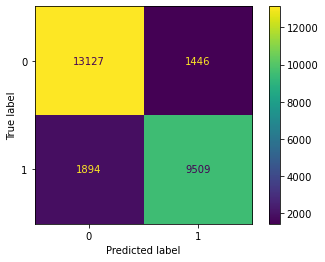

In [121]:
matrix_display.plot()

## Išvados

 - Modelio tikslumas labai geras, bendras teisingo rezultato nuspėjimas 87.18 %
 - Modelio spėjimai pasiskirstę pakankamai proporcingai 44%-56% (0 1 spėjimų santykis)
 - Modelis teigiamą reikšmę teisingai nuspėjo 86.83 % tisklumu
 - Modelis teigiamą reikšmę iš teigiamų teisingai nuspėjo 83.45 % tikslumu, neigiamą iš neigiamų ~90%
 - Tiek Recall tiek F1 reikšmė rodo, jog modelis tiksliau geba nustatyti neigiamą reiškmę.
 - Logistinė regresija šiuo atveju galėtų būti pakeista kitais modeliavimo įrankaiais, tokiais kaip: Random Forest, LightGBM ir pan., nes Logistinės regresijos metu susiduriau su per dideliu kiekiu informacijos, todėl turėjo būti pakeistas max_iter parametras.
 - Vietoj accuracy score, galima būtų naudoti Receiver Operating Characteristic(ROC), kuris tikrina teisingų teigiamų ir neteisingų teigiamų santykį.

Feature: 0, Score: 0.03894
Feature: 1, Score: 2.07128
Feature: 2, Score: -0.00924
Feature: 3, Score: 2.77235
Feature: 4, Score: 0.35208
Feature: 5, Score: -0.00001
Feature: 6, Score: 0.38335
Feature: 7, Score: -0.12169
Feature: 8, Score: -0.14056
Feature: 9, Score: 0.02212
Feature: 10, Score: -0.02289
Feature: 11, Score: 0.60074
Feature: 12, Score: 0.06452
Feature: 13, Score: 0.05230
Feature: 14, Score: 0.31129
Feature: 15, Score: 0.25382
Feature: 16, Score: 0.13466
Feature: 17, Score: 0.32728
Feature: 18, Score: 0.12282
Feature: 19, Score: 0.21871
Feature: 20, Score: 0.00432
Feature: 21, Score: -0.00906


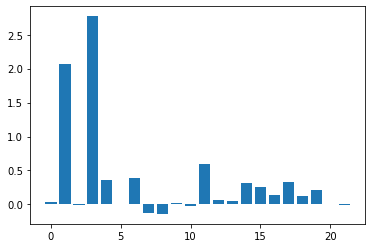

In [127]:
from matplotlib import pyplot
importance = logistic.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [140]:
for i, n in enumerate(df_train.columns):
    print(f'{i}: {n}')

0: Gender
1: Customer Type
2: Age
3: Type of Travel
4: Class
5: Flight Distance
6: Inflight wifi service
7: Departure/Arrival time convenient
8: Ease of Online booking
9: Gate location
10: Food and drink
11: Online boarding
12: Seat comfort
13: Inflight entertainment
14: On-board service
15: Leg room service
16: Baggage handling
17: Checkin service
18: Inflight service
19: Cleanliness
20: Departure Delay in Minutes
21: Arrival Delay in Minutes
22: satisfaction
